In [174]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# <center> EC3389 - Week 4 - Optimization / SciPy</center>

<b>General Comments</b>

+ What is optimization? 

+ Why do we need it in this course?

<b>Background</b>

+ Objective function

+ Constraints

+ Linear functions

+ Convex functions

+ Gradient

+ Notation: min, max, argmin, argmax

<hr>

# Unconstrained Optimization

## By calculus

How would you solve this problem:

\begin{align*}
\min_{x} x(x - 3)
\end{align*}

<hr>

## The simplest algorithm

Let's look at the graph of the function $y = x(x - 3)$. What kind of function is this?  What is its $\arg\min$? What is its $min$? 

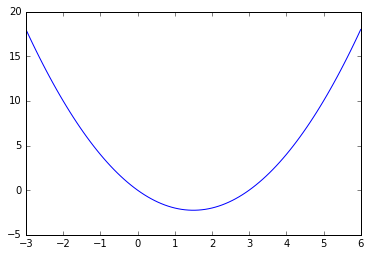

In [189]:
x = np.linspace(start = -3, stop = 6, num  = 100)
y = x*(x - 3)  
plt.plot(x,y)

What does the derivative of this function look like? 

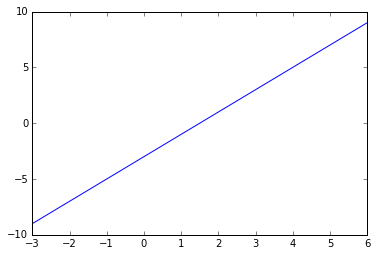

In [190]:
x = np.linspace(start = -3, stop = 6, num  = 100)
y = 2*x - 3 
plt.plot(x,y)

Suppose we want to minimize $f$, and we start with some guess $x_{0}$. 

<b> Question:</b> If we know $f'(x_{0})$, what can we say about the position of the minimum?

## Implementation

<b>Simplest algorithm</b>
<font face = "Courier">
<ul>
<li>Initialize $x = x_0$

<li>Iterate while $|f'(x)|$ is large:

<ul> 
<li>$x = x - step*sign(f'(x))$
</ul>
<li> Return $x$
</ul>
</font>
        

<b>Code</b>

Write the function that returns the gradient of $f = x(x - 3)$.

In [191]:
def fprime(x):
    return 2*x - 3

Write a function that, given $f'$ and a initial value, returns $\arg\min f$ (i.e., the minimizer of $f$).

In [197]:
def simple_minimization(fprime, x_init, tol = 0.0001, step = 0.001):
    # Initialize x
    x = x_init
    
    # Iterate
    while np.abs(fprime(x)) > tol:  # Erase the word False and substitute it by the appropriate expression
        # Step into minimizing direction
        x = x - step*np.sign(fprime(x))
    
    # Return x after all iterations 
    return x

Test your code with the <font face = "Courier">fprime</font> function.

In [198]:
simple_minimization(fprime = fprime, x_init = -3, tol = 0.1) 

1.4509999999997318

<b>Question</b> Can you name some problems with this algorithm?

<hr>

## Numerical derivatives

Recall the definition of derivative you learned in Calc 1:


$$f'(x) = \lim_{h \rightarrow 0}\frac{f(x + h) - f(x)}{h}$$

How could you construct an approximate derivative from this?

<b>(Easy)</b> Write a function that takes a univariate function $f$ and a value $x$ as input, and returns the *value* of f'(x) computed numerically

In [212]:
def fprime_numerical(f, x):
    h = 0.001
    return (f(x + h) - f(x))/h

<b>(Hard)</b> Write a function that takes a univariate function $f$ as input, and returns a *function* $f'$.

In [186]:
def take_derivative(f):
    return

In [203]:
def f_test(x):
    return x*(x - 3)

In [204]:
fprime_numerical(f_test, -2)

-6.998999999998645

<hr>

## Gradient Descent

We would like to make the step *proportional* to the gradient.

Write a function that updates $x$ by taking steps proportional to <font face = "Courier">fprime</font>.

In [172]:
def take_step(x, fprime):
    return 

<b>Gradient descent algorithm</b>
<font face = "Courier">
<ul>
<li>Initialize $x = x_0$
<li>Compute $f'$ and evaluated it at $x$.

<li>Iterate while $|f'(x)|$ is large:

<ul> 
<li>$x = x - \alpha f'(x)$
</ul>
<li> Return $x$
</ul>
</font>
        

In [220]:
def gradient_descent(f, x_init, tol = 0.0001, alpha = 0.001):
    # Initialize x
    x = x_init
    fprime_at_x = fprime_numerical(f, x)
    
    # Iterate
    while np.abs(fprime_at_x) > tol:  # Erase the word False and substitute it by the appropriate expression
        # Step into minimizing direction
        x = x - alpha*fprime_at_x
        fprime_at_x = fprime_numerical(f, x)
        
    
    # Return x after all iterations 
    return x

In [221]:
gradient_descent(f_test, -2)

1.499450052633775

That's it! Add to that about 80 years of bells and whistles.

<hr>

## Using Python's SciPy

In [222]:
import scipy.optimize as opt

In [223]:
def test_function(x):
    return x*(x - 3)

In [224]:
result = opt.minimize(fun = test_function, x0 = 1, tol = 1e-10)
print(result)

      fun: -2.25
 hess_inv: array([[ 0.49999999]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([ 1.49999999])


## How is this relevant for EC3389?

The expression *least squares* should ring some bells.

\begin{align*}
&\min \ \sum_{i}^{n} (y_{i} - a - b_{1}x_{1i} - b_{2}x_{2i})^2 \\
\end{align*}

The least squares problem can be understood as a minimization problem with a squared loss function.

Two weeks from now (and maybe before that, in the homework) we will get to know different loss functions. 

In fact, it very soon we will we will start thinking about the prediction problem in a much more general way:

\begin{align*}
&\min_{\theta} \ \sum_{i}^{n} L(y_{i}, g(x_{i}, \theta)) \\
\end{align*}

<hr>

# Constrained Optimization

We won't go into details, but the theory is rich and the applications abound. Let's use it in SciPy.

\begin{align*}
&\min \qquad &(x_{0} - 1)^2 + (x_{1} - 1)^2 \\
&\text{ subject to} & x_{0} \geq 2 \\
&& x_{1} \geq 2
\end{align*}

What does this function look like? What is points satisfy the constraints? 

In [225]:
test_function = lambda x: (x[0] - 1)**2 + (x[1] - 1)**2

cons = ({"type":"ineq", "fun": lambda x: x[0] - 2},
        {"type":"ineq", "fun": lambda x: x[1] - 2})

In [226]:
result = opt.minimize(fun = test_function,
                      x0 = (1,1),
                      constraints=cons)

print(result)

     fun: 2.0000000000000009
     jac: array([ 2.,  2.,  0.])
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 2.,  2.])


## Ok, but how is <i>that</i> relevant for EC3389?

As we will see soon, it is often the case that constraining your coefficients $b$ can lead to improvements in predictive power! 

\begin{align*}
&\min \qquad &\ f(a,b) = \sum_{i}^{n} (y_{i} - a - b_{1}x_{1i} - b_{2}x_{2i})^2 \\
&\text{ subject to} & b_{1}^{2} + b_{2}^2 \leq C \\
\end{align*}

Restricting the slopes as above leads to a method called *Ridge Regression*.